# Logistic Regression

## Load Data

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
n = 100
d = 2
ranges = 1.5
postives = np.random.randn(n, d) + np.array([ranges, -ranges])
negatives = np.random.randn(n, d) + np.array([-ranges, ranges])

# postives = np.round(postives)
# negatives = np.round(negatives)

postives = np.column_stack((postives, np.ones(n)))
negatives = np.column_stack((negatives, np.zeros(n)))

def split_dataset(X,y, test_size = 0.2):
    '''
    Split the dataset into training and testing set.
    '''
    n = X.shape[0]
    n_test = int(n*test_size)
    n_train = n - n_test
    mask = np.random.permutation(n)
    X = X[mask]
    y = y[mask]
    X_train = X[:n_train]
    y_train = y[:n_train]
    X_test = X[n_train:]
    y_test = y[n_train:]
    return X_train, X_test, y_train, y_test

data = np.vstack((postives, negatives))
np.random.shuffle(data)
X, y = data[:, :-1], data[:, -1]

# train_size = int(2*n*0.8)
# X_train = X[:train_size]
# y_train = y[:train_size]
# X_test = X[train_size:]
# y_test = y[train_size:]

X_train, X_test, y_train, y_test = split_dataset(X, y, 0.2)

print(f'{X_train.shape = }\n{X_test.shape = }\n{y_train.shape = }\n{y_test.shape = }\n')

X_train.shape = (160, 2)
X_test.shape = (40, 2)
y_train.shape = (160,)
y_test.shape = (40,)



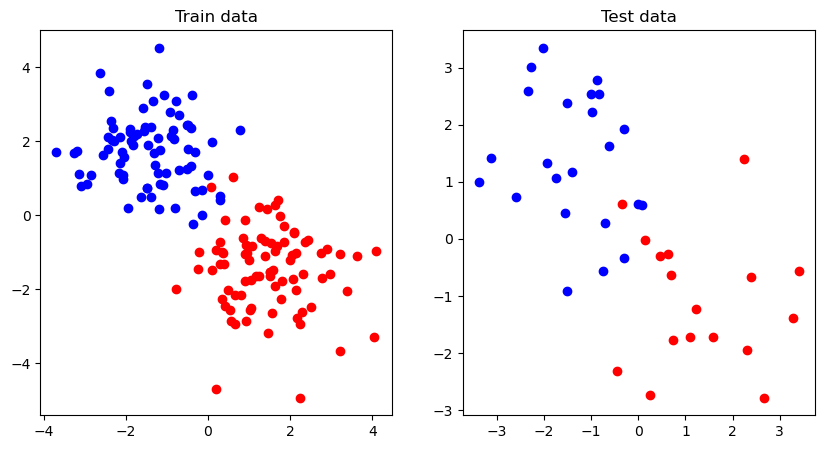

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
_ = axes[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red')
_ = axes[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue')
_ = axes[0].set_title('Train data')
_ = axes[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red')
_ = axes[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue')
_ = axes[1].set_title('Test data')


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logR_builtin = LogisticRegression()
logR_builtin.fit(X_train, y_train)

y_pred = logR_builtin.predict(X_test) 
print(f'Acc : {accuracy_score(y_pred, y_test):.2%}')

LogisticRegression()

Acc : 95.00%


## Custom implementation 

In [19]:
class LogisticRegression_Classifier:
    def __init__(self , alpha = 0.01 , max_iter = 1000 , stochastic = False , stochastic_choice = -1, epsilon = 1e-5):
        # stochastic = True => mini batch gradient descent with batch_size =  stochastic_choice
        self.lr = alpha
        self.max_iter = max_iter
        self.stochastic = stochastic
        self.stochastic_choice = stochastic_choice
        self.epsilon = epsilon

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.n, self.m = X.shape
        self.classes = np.unique(y)
        if self.stochastic :
            if 0 < self.stochastic_choice < self.n:
                self.mini_batch = self.stochastic_choice
            else :
                self.mini_batch = np.random.randint(1,self.n)
        else :
            self.mini_batch = self.n
        self.w = np.random.randn(self.m) + 0.5
        self.b = np.random.randn()
        self.losses = []
        for i in range(self.max_iter):
            w_prev = self.w.copy()
            self.update_weights()
            self.losses.append(self.loss())
            if np.linalg.norm(w_prev - self.w) < self.epsilon:
                print(f'Converged at {i} iteration')
                break
        # return self.losses
    
    def update_weights(self):
        dw = np.zeros(self.m)
        db = 0
        indices = np.random.choice(self.n, self.mini_batch, replace=False)
        for i in indices:
            y_pred = self.sigmoid(np.dot(self.w, self.X_train[i]) + self.b)
            dw += (y_pred - self.y_train[i]) * self.X_train[i]
            db += (y_pred - self.y_train[i])
        if self.lr > 0.001:
            self.lr = self.lr * 0.99
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def predict(self,X):
        y = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            if self.classes.shape[0] > 2:
                y[i] = np.argmax(self.softmax(np.dot(self.w,X[i]) + self.b))
            else:
                y[i] = 1 if self.sigmoid(np.dot(self.w,X[i]) + self.b) > 0.5 else 0
        return y

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=0) 

    def loss(self):
        epsilon = 1e-15 
        loss = 0
        for i in range(self.n):
            if self.classes.shape[0] > 2:
                y_pred = self.softmax(np.dot(self.w, self.X_train[i]) + self.b)
                loss += -np.log(y_pred[self.y_train[i]])
            else:
                y_pred = self.sigmoid(np.dot(self.w, self.X_train[i]) + self.b)
                y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
                loss += self.y_train[i] * np.log(y_pred) + (1 - self.y_train[i]) * np.log(1 - y_pred)
        return -loss/self.n

    def acc_score(self, y_true, y_pred):
        return np.mean(y_true == y_pred)
    
    def plot(self):
        plt.plot(self.losses)
        plt.xlabel('max_iter')
        plt.ylabel('Loss')
        plt.show()

In [20]:
logR_builtin = LogisticRegression_Classifier()
logR_builtin.fit(X_train, y_train)

y_pred = logR_builtin.predict(X_test) 
print(f'Acc : {accuracy_score(y_pred, y_test):.2%}')

Acc : 97.50%
